## Clustering and PCA 

## HELP International Case Study
#####  By: Swathi Kommana



### Problem Statement

HELP International is an international humanitarian NGO which is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

The NGO is able to raise around 10 Million. The CEO of the NGO needs to decide how to use this money strategically and effectively.

### Goal:

To choose the countries that are in the direst need of aid.


### Step -1 : Reading and Understanding the data

In [917]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [918]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### Reading the data

In [919]:
countrydf = pd.read_csv('Country-data.csv')

In [920]:
countrydf.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


Performing  the basic EDA

In [921]:
countrydf.shape

(167, 10)

In [922]:
countrydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 12.4+ KB


In [923]:
countrydf.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Let's do a sanity check on the dataframe for missing values.

In [924]:
# percentage of missing values in each column
round(countrydf.isnull().sum()/len(countrydf.index), 2)*100

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [925]:
# Dropping Duplicates if any
countrydf=countrydf.drop_duplicates()

### Outliers Treatment

Check for the outliers and remove from the dataset

In [926]:
def plot_cat(var_list,df):
#Function to plot a list of categorical variables together
    plt.figure(figsize=(20, 15))
    for var in var_list:
        plt.subplot(3,4,var_list.index(var)+1)
        sns.boxplot(y=var, data = df)
    plt.show()

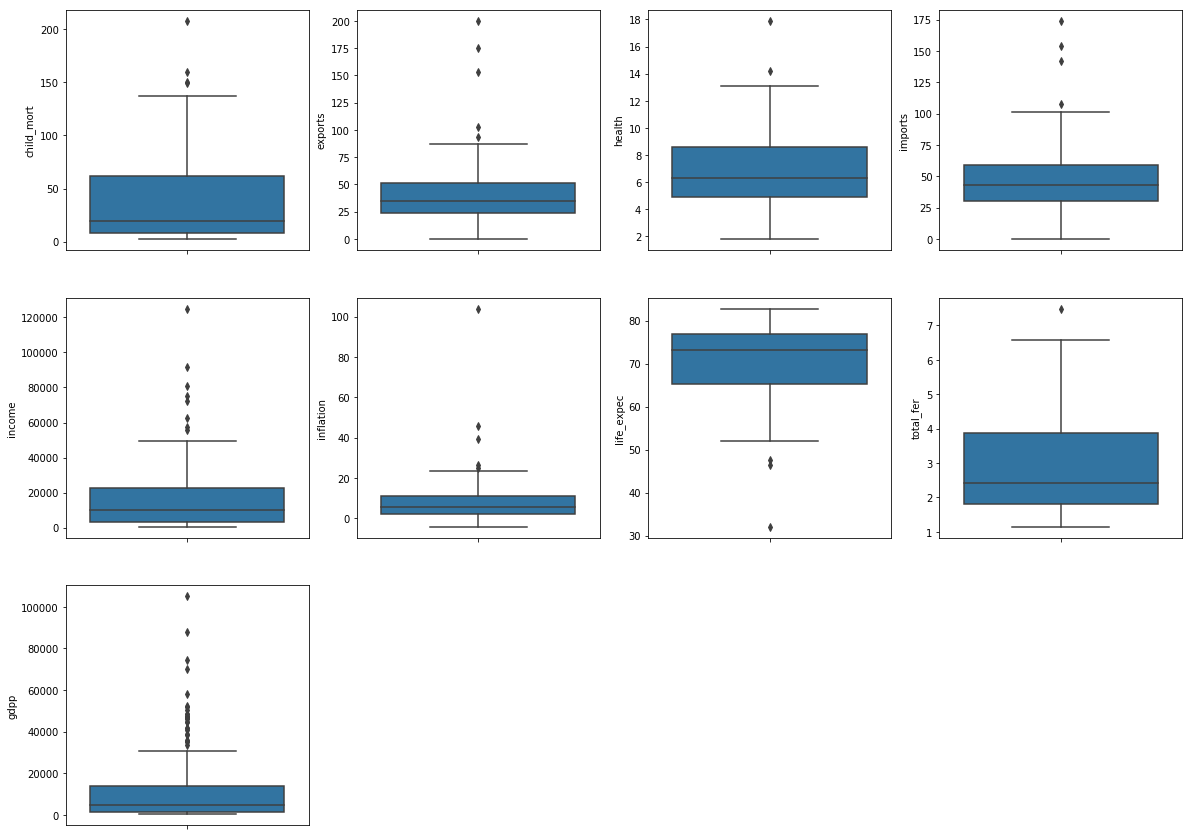

In [927]:
var = ["child_mort","exports","health","imports","income","inflation","life_expec","total_fer","gdpp"]
plot_cat(var,countrydf) 

From the above figure, it is observed that outliers are present in exports, income, inflation and gdpp Features

In [928]:

Q1 = countrydf["exports"].quantile(0.25)
Q3 = countrydf["exports"].quantile(0.75)
IQR = Q3 - Q1
country=countrydf[(countrydf["exports"] >= (Q1 - 1.5*IQR)) & (countrydf["exports"] <= (Q3 + 1.5*IQR))]

In [929]:
Q1 = country["income"].quantile(0.25)
Q3 = country["income"].quantile(0.75)
IQR = Q3 - Q1
country = country[(country["income"] >= (Q1 - 1.5*IQR)) & (country["income"] <= (Q3 + 1.5*IQR))]

In [930]:
Q1 = country["inflation"].quantile(0.25)
Q3 = country["inflation"].quantile(0.75)
IQR = Q3 - Q1
country = country[(country["inflation"] >= (Q1 - 1.5*IQR)) & (country["inflation"] <= (Q3 + 1.5*IQR))]

In [931]:
Q1 = country["gdpp"].quantile(0.25)
Q3 = country["gdpp"].quantile(0.75)
IQR = Q3 - Q1
country = country[(country["gdpp"] >= (Q1 - 1.5*IQR)) & (country["gdpp"] <= (Q1 + 1.5*IQR))]
country_new = country 

Check again if there are any significant outliers

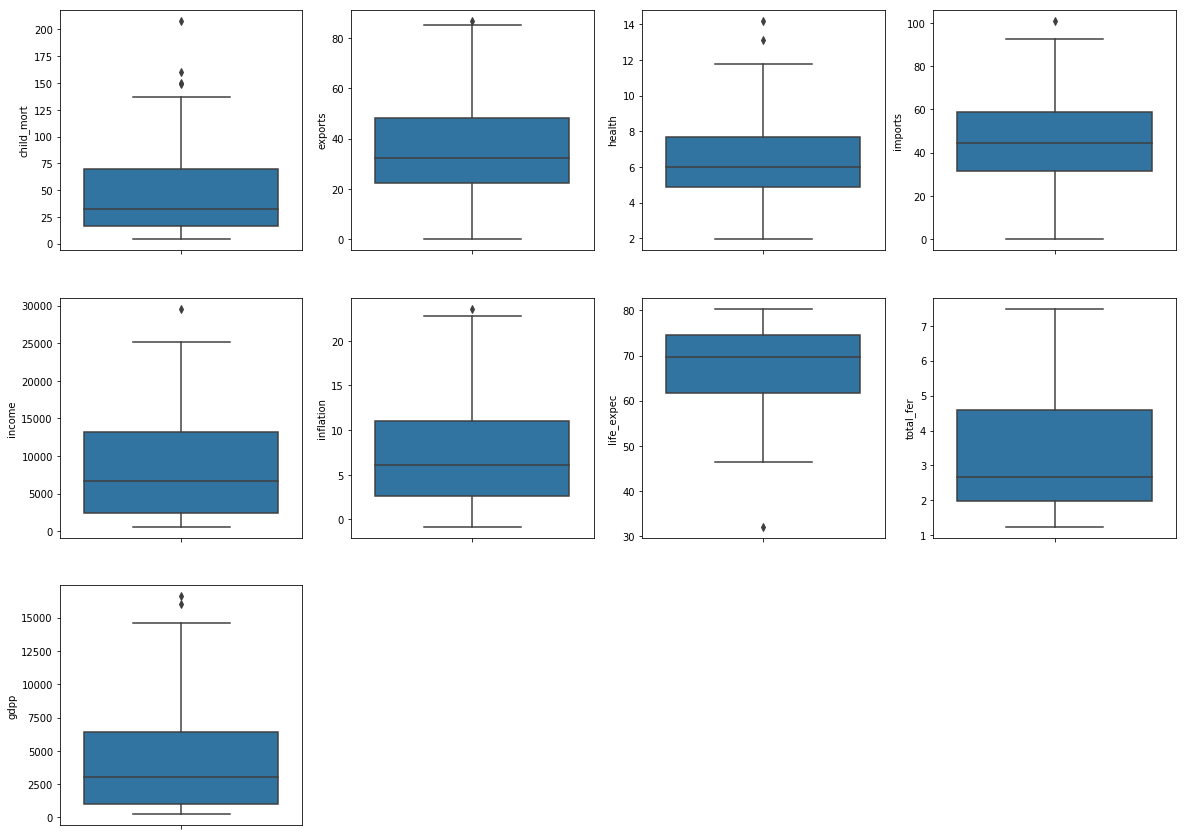

In [932]:
plot_cat(var,country) 

Above graph says that, there are no outliers in most of the columns and the outliers which are present can be ignored as the difference between quartile 3 and Maximum is minimum

In [933]:
country.shape

(123, 10)

So now we are left with 123 datapoints. Lets check for the Correlaltion in the Dataset. To perform this, country column has to be dropped

In [934]:
#Dropping country column
country = country.drop(['country'],axis=1)

In [935]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(country.transpose())

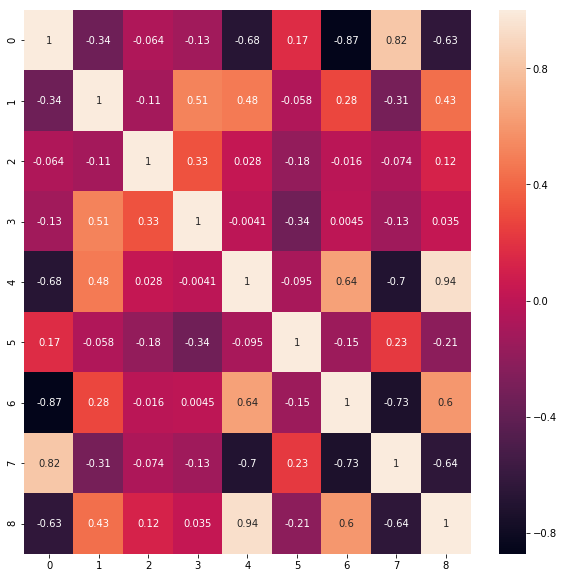

In [936]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(corrmat,annot = True)

Above figure says that, there is correlation between most of the columns. So lets perform PCA to minimise the number of columns

### Standard Scaling

In [937]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
normdf = standard_scaler.fit_transform(country)

### PCA

In [938]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [939]:
#Doing the PCA on the data
pca.fit(normdf)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

Let's plot the principal components and try to make sense of them
We'll plot original features on the first 2 principal components as axes

In [940]:
pca.components_

array([[-4.35224444e-01,  2.60536991e-01,  4.45146195e-02,
         9.91220109e-02,  4.34052958e-01, -1.30592267e-01,
         4.09649375e-01, -4.23923629e-01,  4.21797666e-01],
       [ 7.96117783e-02,  2.56489480e-01,  4.45749795e-01,
         6.95308146e-01, -1.41906064e-01, -4.36035246e-01,
        -1.71549171e-01,  4.69526885e-02, -6.18956696e-02],
       [ 1.12145352e-01,  6.88205677e-01, -5.50712990e-01,
         2.60036783e-01,  6.54198319e-02,  3.22148417e-01,
        -1.23509403e-01,  1.38345780e-01, -2.09513055e-02],
       [ 8.04681391e-02,  9.33839464e-02,  6.21354538e-01,
         1.30727256e-02,  2.09823676e-01,  6.97979451e-01,
        -1.47509316e-01,  9.20535405e-02,  1.92659848e-01],
       [ 4.00145327e-01,  6.15751329e-02, -3.12973510e-02,
        -2.75026346e-01,  3.89450195e-01, -3.89442615e-01,
        -3.73421304e-01,  2.28856106e-01,  5.14118287e-01],
       [ 1.10655870e-01, -2.12104211e-01, -1.52612995e-01,
         1.60381221e-01,  7.61238897e-02,  1.139957

Looking at the scree plot to assess the number of needed principal components

In [941]:
pca.explained_variance_ratio_

array([0.46681916, 0.17591128, 0.12439527, 0.09085907, 0.07598969,
       0.03039989, 0.01948929, 0.0112245 , 0.00491186])

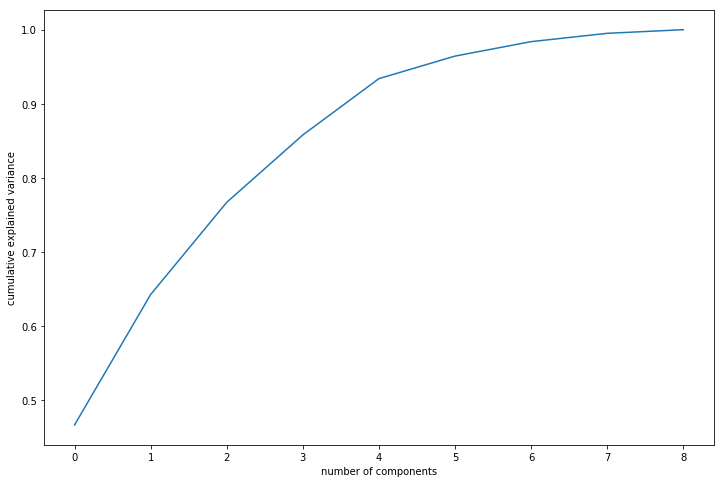

In [942]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 5 components are enough to describe 93% of the variance in the dataset
- We'll choose 5 components for our modeling

In [943]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

#### Basis transformation - getting the data onto our PCs

In [944]:
df_pca = pca_final.fit_transform(normdf)
df_pca.shape

(123, 5)

#### Creating correlation matrix for the principal components - we expect little to no correlation

In [945]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

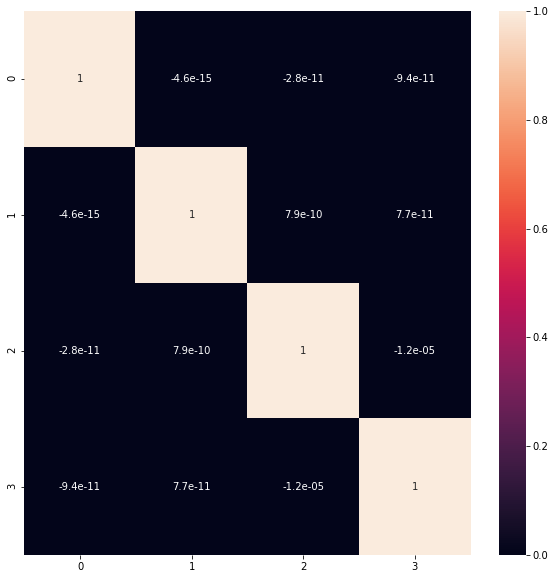

In [946]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,10))
sns.heatmap(corrmat,annot = True)

In [947]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 7.896799804358591e-10 , min corr:  -1.2409147872206981e-05


#### Indeed - there is no correlation between any two components! Good job, PCA!
- We effectively have removed multicollinearity from our situation, and our models will be much more stable

In [948]:
df_train_pca

array([[-1.98151280e+04,  1.65112472e+03,  3.84293749e+01,
        -2.21362774e-01],
       [-1.13389390e+04, -1.49346903e+03, -2.81798667e+01,
        -1.40864421e+01],
       [-8.92635259e+03, -3.26468410e+03, -1.19220218e+01,
        -1.67762661e+01],
       [-1.46524659e+04,  8.67795270e+02,  5.95515615e+01,
         4.05409964e+01],
       [ 8.96142032e+02, -1.89847815e+03, -2.91306480e+01,
         4.90929710e-01],
       [-6.99699306e+02, -3.00451171e+03, -7.60860049e+00,
        -4.52108802e+01],
       [-1.42839444e+04,  9.29672241e+01, -2.74632322e+01,
        -1.92449303e+01],
       [ 4.43727025e+04,  1.16354527e+04,  1.07916596e+01,
        -4.37287252e+01],
       [ 4.22463421e+04,  6.76525844e+03, -1.69456998e+00,
        -6.95801542e+00],
       [-5.72551309e+03, -4.39118182e+03,  2.75342772e+00,
        -1.00961952e+01],
       [ 1.45108648e+04,  6.97390702e+03, -1.32279257e+01,
        -1.29707671e+01],
       [ 2.27232733e+04, -1.08330393e+04, -6.78705655e+00,
      

In [949]:
pca_again = PCA(0.95)

In [950]:
df_train_pca2 = pca_again.fit_transform(normdf)
df_train_pca2.shape

(123, 6)

Above says that, for attaining 95% PcA, 6 components should be connsidered but 93% PCA is a very good value to proceed with

In [951]:
pca_final=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5'])

In [952]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [953]:
hopkins(pca_final)

0.6619969432677306

71% is a good value for performing the Clustering

In [954]:
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(pca_final)
    sse_.append([k, silhouette_score(pca_final, kmeans.labels_)])

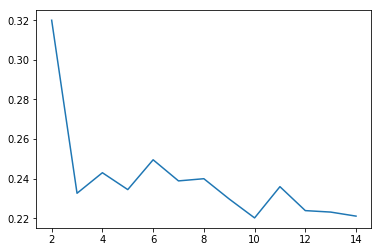

In [955]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

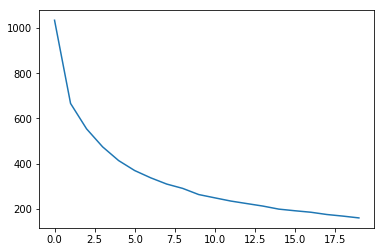

In [956]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(pca_final)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

From the above figure, we can consider the number of clusters as 5. Since from 5 there is very minimal variation.

In [957]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 5, max_iter=50)
model_clus5.fit(pca_final)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [958]:
# analysis of clusters formed
#country.index = pd.RangeIndex(len(country.index))
pca_final.reset_index(inplace=True)
PCA_km=pd.concat([pca_final, pd.Series(model_clus5.labels_)], axis=1)

PCA_km=pd.merge(PCA_km,country_new,left_on='index', right_index=True)



In [959]:
PCA_km=PCA_km.drop(['PC1','PC2','PC3','PC4','PC5','index'],axis=1)
PCA_km.head()

,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,4,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,2,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [960]:
PCA_km.rename(columns={0: 'ClusterID'}, inplace=True)

In [961]:
PCA_km=PCA_km.loc[:,~PCA_km.columns.duplicated()]

In [962]:

km_clusters_child_mort = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(PCA_km.groupby(["ClusterID"]).gdpp.mean())


In [963]:
df = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,48.378571,36.162857,6.082857,50.314286,7514.285714,5.807143,67.200000,2.95000,3500.928571
1,1,48.635000,37.685000,6.537500,48.390000,10219.500000,5.807150,68.420000,3.03550,5548.800000
2,2,52.955556,35.717167,5.951667,45.142550,8420.388889,9.091333,67.694444,3.26000,4103.777778
3,3,66.462500,33.632500,6.398125,44.043750,6432.000000,8.189687,64.481250,4.03375,3397.625000
4,4,36.492000,35.803600,6.210000,45.848000,9370.960000,7.473280,69.996000,3.02440,4781.600000


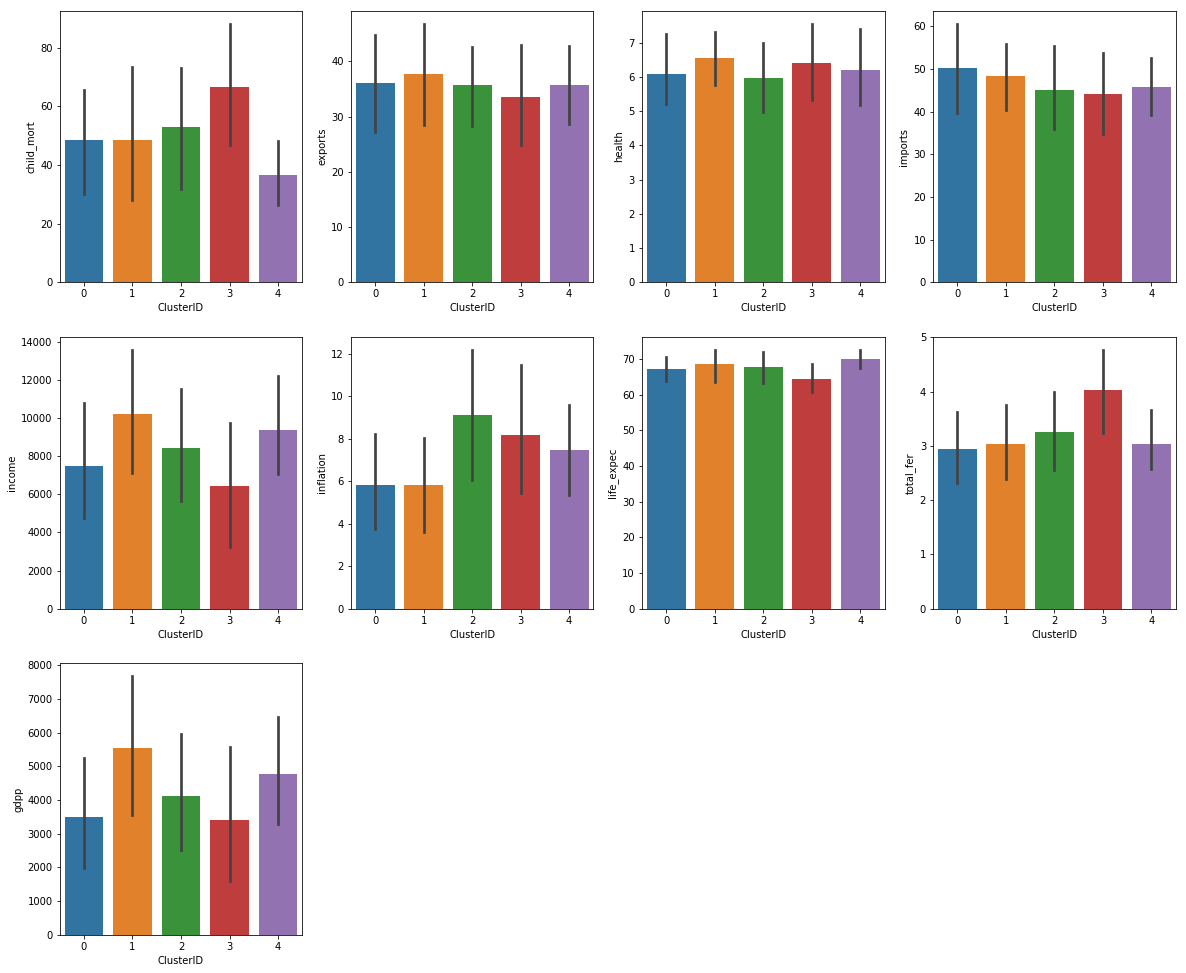

In [964]:
plt.figure(figsize=(20, 17))
plt.subplot(3,4,1)

#plt.subplot(3,4,var_list.index(var)+1)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.child_mort)
plt.subplot(3,4,2)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.exports)
plt.subplot(3,4,3)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.health)
plt.subplot(3,4,4)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.imports)
plt.subplot(3,4,5)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.income)
plt.subplot(3,4,6)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.inflation)
plt.subplot(3,4,7)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.life_expec)
plt.subplot(3,4,8)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.total_fer)
plt.subplot(3,4,9)
sns.barplot(x=PCA_km.ClusterID, y=PCA_km.gdpp)


### Observations from K-Means

- There is no significant variation between the clusters for features `exports`, `health`, `life_expec` and `imports`
- child_mort rate is high in cluster 2 and low in cluster 4
- Income is high in cluster 0 and low in cluster 2
- Inflation is high for cluster 2&4 and low for cluster 0 & 1
- total_fer is high for cluster 2 
- gdpp is high for cluster 0 and low for cluster 1 & 2

Thus we can say that countries within Cluster 2 need more aid than other countries

In [965]:
PCA_km[PCA_km.ClusterID == 2]

,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
2,2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460
3,2,Angola,119.0,62.300,2.85,42.9000,5900,22.400,60.1,6.16,3530
14,2,Belarus,5.5,51.400,5.61,64.5000,16200,15.100,70.4,1.49,6030
31,2,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446
37,2,"Congo, Dem. Rep.",116.0,41.100,7.91,49.6000,609,20.800,57.5,6.54,334
39,2,Costa Rica,10.2,33.200,10.90,35.0000,13000,6.570,80.4,1.92,8200
45,2,Dominican Republic,34.4,22.700,6.22,33.3000,11100,5.440,74.6,2.60,5450
56,2,Gambia,80.3,23.800,5.69,42.7000,1660,4.300,65.5,5.71,562
63,2,Guinea,109.0,30.300,4.93,43.2000,1190,16.100,58.0,5.34,648
71,2,Iran,19.3,24.400,5.60,19.4000,17400,15.900,74.5,1.76,6530


### Heierarchial Clustering

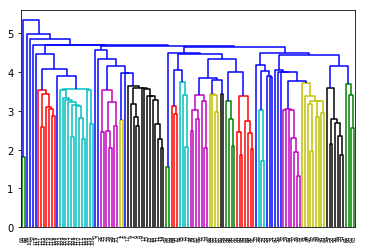

In [966]:
# heirarchical clustering
mergings = linkage(pca_final, method = "single", metric='euclidean')
dendrogram(mergings)
plt.show()

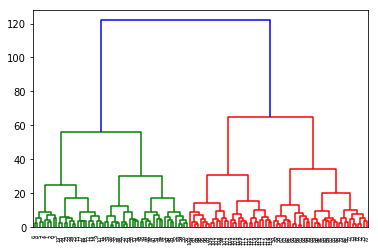

In [967]:
mergings = linkage(pca_final, method = "complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [968]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))
PCA_hc = pd.concat([pca_final, clusterCut], axis=1)
PCA_hc=pd.merge(PCA_hc,country_new,left_on='index', right_index=True)


In [969]:
PCA_hc.head()

,index,PC1,PC2,PC3,PC4,PC5,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,2.965667,0.306109,-0.678003,0.461480,0.251629,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,-1.226166,-0.054798,-0.801749,-0.627417,-0.737676,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,-0.763766,-1.859467,0.698310,0.352839,-0.671646,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,2.239070,-1.035548,3.122761,1.279217,0.460988,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,-2.976788,0.367657,0.013877,-0.346170,0.935592,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [970]:
PCA_hc=PCA_hc.drop(['PC1','PC2','PC3','PC4','index'],axis=1)
PCA_hc.head()

,PC5,0,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.251629,0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,-0.737676,0,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,-0.671646,0,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,0.460988,0,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,0.935592,0,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [971]:
PCA_hc.rename(columns={0: 'ClusterID'}, inplace=True)

In [972]:
PCA_hc=PCA_hc.loc[:,~PCA_hc.columns.duplicated()]

In [973]:

km_clusters_child_mort = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).child_mort.mean())
km_clusters_exports = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).exports.mean())
km_clusters_health = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).health.mean())
km_clusters_imports = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).imports.mean())
km_clusters_income = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).income.mean())
km_clusters_inflation = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).inflation.mean())
km_clusters_life_expec = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).life_expec.mean())
km_clusters_total_fer = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).total_fer.mean())
km_clusters_gdpp = 	pd.DataFrame(PCA_hc.groupby(["ClusterID"]).gdpp.mean())

In [974]:
df_hc = pd.concat([pd.Series([0,1,2,3,4]), km_clusters_child_mort, km_clusters_exports, km_clusters_health,km_clusters_imports,km_clusters_income,km_clusters_inflation,km_clusters_life_expec,km_clusters_total_fer,km_clusters_gdpp], axis=1)
df_hc.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
df_hc.head()

,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0,41.470000,35.210000,6.201000,42.020000,10028.000000,8.117300,69.920000,2.865500,5290.700000
1,1,56.037500,34.521250,5.960833,39.916667,7648.375000,7.011500,67.158333,3.695417,4216.541667
2,2,49.538462,36.238462,6.658462,53.734615,9222.692308,7.934846,66.357692,3.035385,4446.961538
3,3,48.547826,37.443000,6.106957,49.572430,7584.000000,6.175043,68.426087,3.300870,3701.173913
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


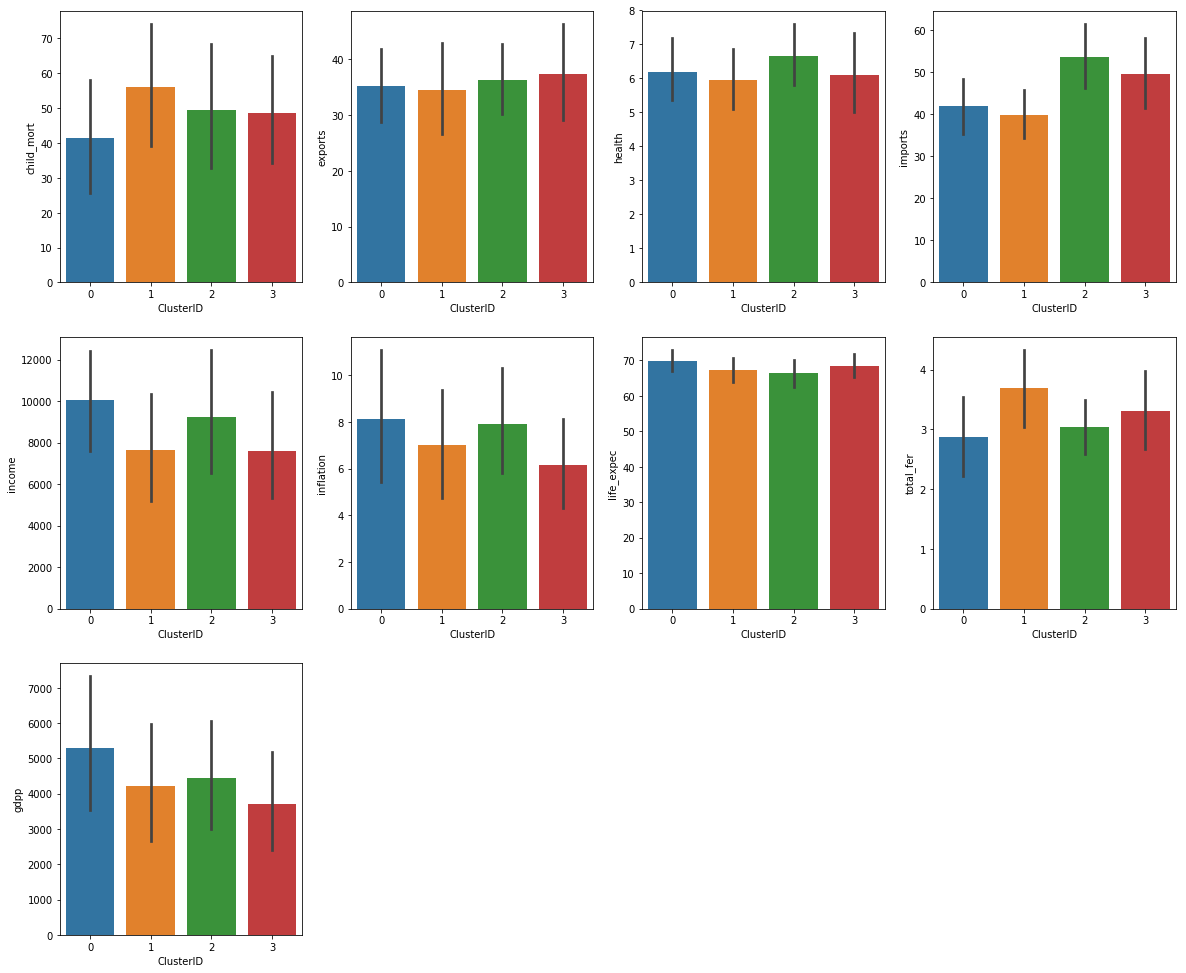

In [975]:
plt.figure(figsize=(20, 17))
plt.subplot(3,4,1)

#plt.subplot(3,4,var_list.index(var)+1)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.child_mort)
plt.subplot(3,4,2)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.exports)
plt.subplot(3,4,3)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.health)
plt.subplot(3,4,4)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.imports)
plt.subplot(3,4,5)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.income)
plt.subplot(3,4,6)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.inflation)
plt.subplot(3,4,7)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.life_expec)
plt.subplot(3,4,8)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.total_fer)
plt.subplot(3,4,9)
sns.barplot(x=PCA_hc.ClusterID, y=PCA_hc.gdpp)

### Observations from Hierarchial Clustering

- There is no significant variation between the clusters for features `exports`, `health`, `life_expec`
- child_mort rate is high in cluster 1 and low in cluster 2
- imports high in cluster 2
- Income is high in cluster 2 and low in cluster 3
- Inflation is high for cluster 0 and low for cluster 3
- total_fer is high for cluster 1 
- gdpp is high for cluster 2 and low for cluster 3

In [978]:
PCA_hc[PCA_hc.ClusterID == 1]

,PC5,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,0.746968,1,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231
27,-0.415483,1,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786
28,0.098838,1,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310
30,-0.234841,1,Cape Verde,26.5,32.70,4.09,61.8,5830,0.505,72.5,2.67,3310
31,-0.410617,1,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446
32,-0.213327,1,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897
33,0.954468,1,Chile,8.7,37.70,7.96,31.3,19400,8.960,79.1,1.88,12900
34,1.335899,1,China,15.7,26.30,5.07,22.6,9530,6.940,74.6,1.59,4560
35,0.048626,1,Colombia,18.6,15.90,7.59,17.8,10900,3.860,76.4,2.01,6250
36,-0.454820,1,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769


In [977]:
PCA_hc[PCA_hc.ClusterID == 3]

,PC5,ClusterID,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
92,1.200187,3,"Macedonia, FYR",10.4,39.800,7.09,58.1000,11400,2.040,74.0,1.47,4540
93,0.531210,3,Madagascar,62.2,25.000,3.77,43.0000,1390,8.790,60.8,4.60,413
94,0.892995,3,Malawi,90.5,22.800,6.59,34.9000,1030,12.100,53.1,5.31,459
95,0.025287,3,Malaysia,7.9,86.900,4.39,71.0000,21100,7.270,74.5,2.15,9070
96,-0.308280,3,Maldives,13.2,77.600,6.33,65.4000,10500,2.880,77.9,2.23,7100
97,0.277527,3,Mali,137.0,22.800,4.98,35.1000,1870,4.370,59.5,6.55,708
99,0.450510,3,Mauritania,97.4,50.700,4.41,61.2000,3320,18.900,68.2,4.98,1200
100,1.618602,3,Mauritius,15.0,51.200,6.00,62.2000,15900,1.130,73.4,1.57,8000
101,-0.985078,3,"Micronesia, Fed. Sts.",40.0,23.500,14.20,81.0000,3340,3.800,65.4,3.46,2860
102,1.425836,3,Moldova,17.2,39.200,11.70,78.5000,3910,11.100,69.7,1.27,1630
